In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [3]:
keras.__version__

'2.11.0'

Load Data

In [4]:
train_data_path = '/content/drive/MyDrive/horse-or-human/train'
validation_data_path = '/content/drive/MyDrive/horse-or-human/validation'

Data Preprocessing

In [5]:
training_datagen = ImageDataGenerator(rescale=1./225,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [6]:
training_data = training_datagen.flow_from_directory(train_data_path,
                                     target_size=(150,150),
                                     batch_size=32,
                                     class_mode='binary')

Found 1027 images belonging to 2 classes.


In [7]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [8]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 256 images belonging to 2 classes.


In [10]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

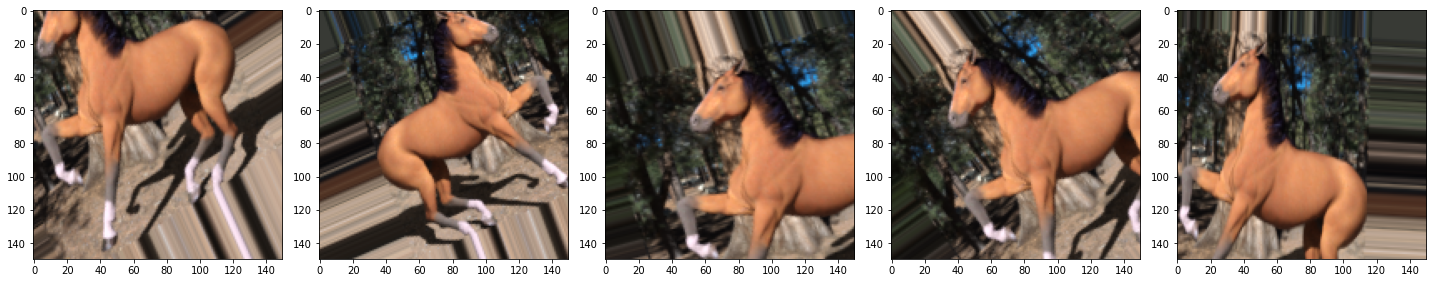

In [11]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

#Building CNN Model

In [12]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150,150,3]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),#neural network beulding
    keras.layers.Dense(units=128, activation='relu'),#input layers
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=2, activation='softmax')#output layer

])



Compile CNN Model

In [13]:
cnn_model.compile(optimizer= Adam(lr=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
model_path = '/content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]

#Train CNN Model

In [15]:
history = cnn_model.fit(training_data,
                        epochs=100,
                        verbose=1,
                        validation_data=valid_data,
                        callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.6820 - accuracy: 0.5433
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5
33/33 [==============================] - 219s 6s/step - loss: 0.6820 - accuracy: 0.5433 - val_loss: 0.7535 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.5921 - accuracy: 0.6806
Epoch 2: val_accuracy improved from 0.50000 to 0.75781, saving model to /content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5
33/33 [==============================] - 14s 425ms/step - loss: 0.5921 - accuracy: 0.6806 - val_loss: 0.4825 - val_accuracy: 0.7578
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.5211 - accuracy: 0.7390
Epoch 3: val_accuracy did not improve from 0.75781
33/33 [==============================] - 13s 399ms/step - loss: 0.5211 - accuracy: 0.7390 - val_loss: 0.8881 - val_accuracy: 0.62

#summarize History for accuracy

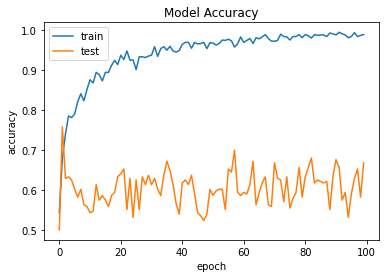

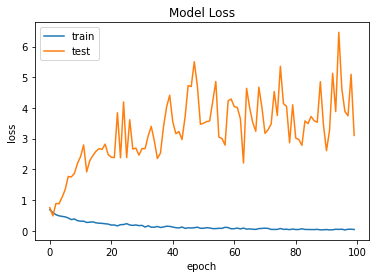

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()